In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Soal No. 1**

In [328]:
# Membaca dataset seattle-weather
weather_df = pd.read_csv('seattle-weather.csv')

In [329]:
# Menampilkan 15 baris data teratas
weather_df.head(15)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


**Soal No. 2**

In [330]:
# Munculkan informasi dataset
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [331]:
# Mengecek dan menghapus nilai kosong
weather_df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [332]:
df = weather_df.dropna()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [333]:
# Menghapus (drop) kolom "date"
df = df.drop(['date'], axis=1)
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [334]:
# Mengecek dan menghapus data yang memiliki nilai duplikat
df.duplicated().sum()

8

In [335]:
df.drop_duplicates()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


**Soal No. 3**

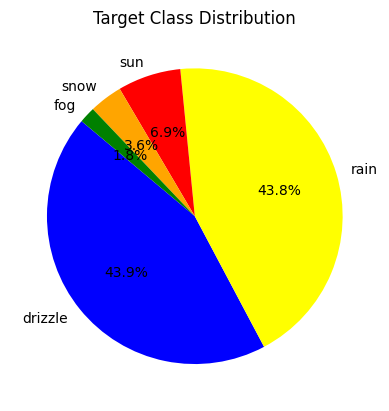

In [336]:
# Pie Chart untuk proporsi kategori target
target = df['weather'].value_counts()
labels = df['weather'].unique()
colors = ['blue', 'yellow', 'red', 'orange', 'green']

plt.pie(target, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Target Class Distribution')
plt.show()

In [337]:
# Mengecek persentase kemunculan nilai pada kolom weather
round(df['weather'].value_counts() / df['weather'].count() * 100, 1)

rain       43.9
sun        43.8
fog         6.9
drizzle     3.6
snow        1.8
Name: weather, dtype: float64

**Soal No. 4**

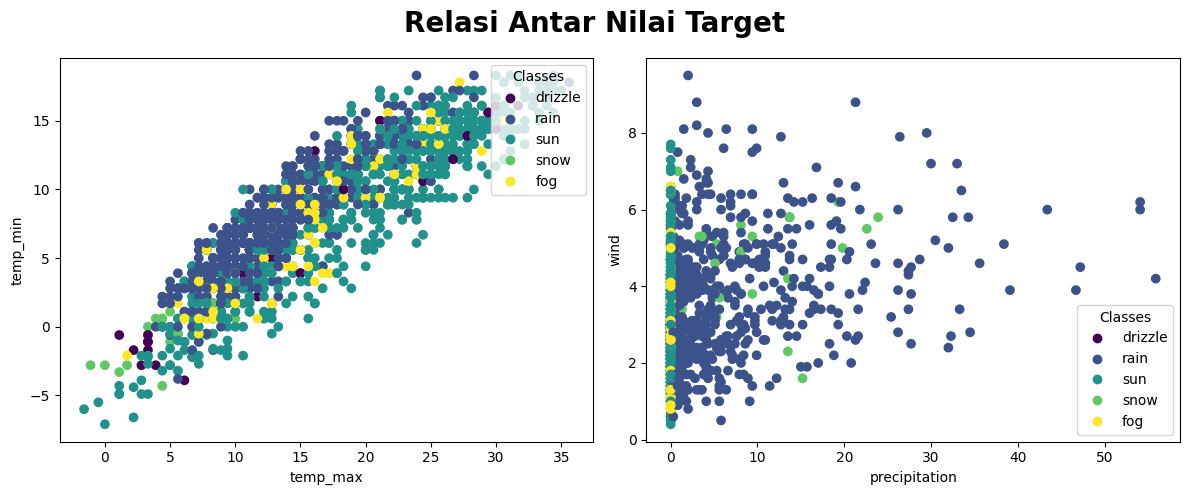

In [338]:
target_names= df['weather'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

target = df['weather'].replace({
  'drizzle': 0,
  'rain': 1,
  'sun' : 2,
  'snow': 3,
  'fog': 4
})

# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['temp_max'], df['temp_min'],
c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names,
loc="upper right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'],
c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names,
loc="lower right", title="Classes")
fig = fig.suptitle("Relasi Antar Nilai Target", fontsize=20,
fontweight="bold")
plt.tight_layout()

**Soal No. 5**

In [339]:
from sklearn.model_selection import train_test_split

# Variabel X untuk menampung seluruh kolom fitur selain kolom target
X = df.iloc[:, :-1]

# Variabel y untuk menampung kolom target
y = df.iloc[:, -1]

# Membagi dataset menjadi train dan test set dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

**Soal No. 6**

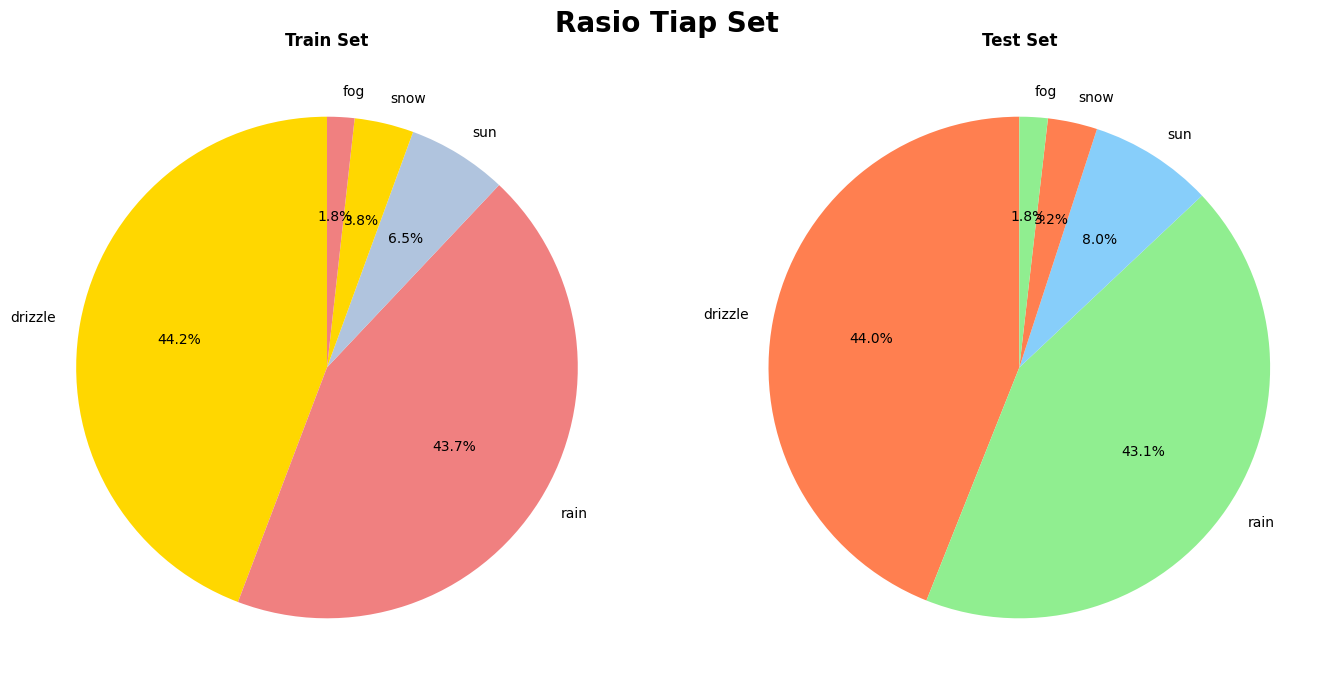

In [340]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].unique()
colors1 = ['gold', 'lightcoral', 'lightsteelblue']
colors2 = ['coral', 'lightgreen', 'lightskyblue']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names,
colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names,
colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

**Soal No. 7**

In [341]:
# Import library untuk pemodelan Decision Tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# Import library untuk penghitungan akurasi model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [342]:
# Membuat model Decision Tree
model_tree = DecisionTreeClassifier()

In [343]:
# Melatih model dengan train set
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [344]:
# Memprediksi output target dengan model
y_pred = model_tree.predict(X_test)

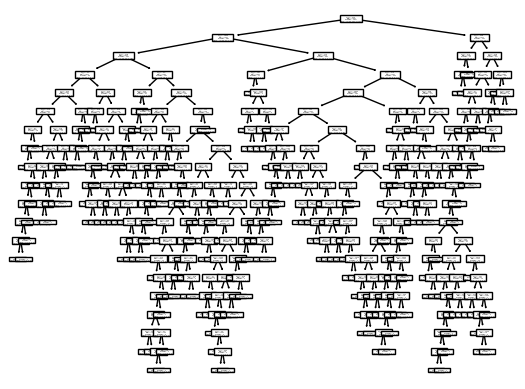

In [345]:
# Menampilkan model dengan plot
tree.plot_tree(model_tree)
plt.show()

**Soal No. 8**

In [346]:
# Menampilkan informasi akurasi model
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasil akurasi
print("Akurasi model: {:.2f}%".format(accuracy * 100))

              precision    recall  f1-score   support

     drizzle       0.06      0.07      0.07        14
         fog       0.29      0.23      0.25        35
        rain       0.91      0.92      0.91       189
        snow       0.33      0.25      0.29         8
         sun       0.77      0.79      0.78       193

    accuracy                           0.77       439
   macro avg       0.47      0.45      0.46       439
weighted avg       0.76      0.77      0.76       439

Akurasi model: 76.77%


In [347]:
# Import library untuk pemodelan Naive Bayes
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [348]:
# Membuat model Naive Bayes
model_nb = GaussianNB()

In [349]:
# Melatih model dengan train set
model_nb.fit(X_train, y_train)

GaussianNB()

In [350]:
# Memprediksi output target dengan model
y_pred = model_nb.predict(X_test)

In [351]:
# Menampilkan informasi akurasi model
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasil akurasi
print("Akurasi model: {:.2f}%".format(accuracy * 100))


              precision    recall  f1-score   support

     drizzle       0.60      0.21      0.32        14
         fog       0.00      0.00      0.00        35
        rain       0.97      0.92      0.95       189
        snow       0.60      0.38      0.46         8
         sun       0.76      0.99      0.86       193

    accuracy                           0.85       439
   macro avg       0.59      0.50      0.52       439
weighted avg       0.78      0.85      0.80       439

Akurasi model: 84.51%


**Soal No.9**

**Kesimpulan**

Proses pengerjaan project dimulai dengan memuat dataset yang bertipe csv menggunakan library pandas. Dataset kemudian melalui tahap pre-processing yang didalamnya terdapat proses penghapusan null values, pembagian train dan test set, dan visualisasi.

Setelah dataset selesai diproses, kita dapat menggunakan pemodelan untuk membuat prediksi. Pada project ini, kami menggunakan dua model yaitu Decision Tree dan Naive Bayer Classiffier. Dari dua model tersebut, dapat disimpulkan bahwa untuk dataset seattle-weather yang merupakan data klasifikasi cuaca, model Naive Bayes menghasilkan akurasi sekitar 85 persen, 10 persen lebih tinggi dari model Decision Tree.